<a href="https://colab.research.google.com/github/zigzagzackey/Study-Material-for-CGH/blob/master/Phase_Hologram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 位相ホログラム
このPython Notebookでは，位相ホログラムのプログラムをPythonとNumpyを用いて実装します．

実行する際は，Playgroundにするか，自分のGoogle Driveにこのファイルをコピーしてから，

上にあるメニューバーの「ランタイム」から「すべてのセルを実行」を選んでください．

簡易な説明とソースコードのみを記載するので，詳細を知りたい場合は以下に示す参考文献を確認してください．

**参考文献**

伊藤智義, 下馬場朋禄. ホログラフィ入門: コンピュータを利用した3次元映像・3次元計測. 講談社, 2017, 171p.

Digital Nature Group 山本 健太さんのホログラム勉強会のスライド及びソースコード

## モジュールのインストール


In [0]:
!pip install nptyping

## モジュールのインポート

In [0]:
# OpenCVモジュールのインポート
import cv2
# NumPyモジュールのインポート
import numpy as np
# matplotlib.pyplotモジュールのインポート
import matplotlib.pyplot as plt
# typingモジュールのインポート
from typing import List
from typing import Tuple
from typing import Any
# nptypingモジュールのインポート
from nptyping import NDArray
# Google Colab用cv2.imshowモジュールのインポート
from google.colab.patches import cv2_imshow

## 位相ホログラムを計算する関数の実装
ホログラム面上$ \alpha $の位相$ \phi_{\alpha} $は，

$ \phi_{\alpha} = \tan^{-1} \frac{{\rm Im}}{{\rm Re}} $

で求まる．

ここで，

$ {\rm Im} = \frac{1}{r} \cos(kr) $,

$ {\rm Re} = \frac{1}{r} \sin(kr) $,

$r$は光源からホログラム面までの$x, y, z$間の距離のことで，$r = \sqrt{x^2 + y^2 + z^2}$で表され，

$k$は波数=周期$2\pi$の中に波長がいくつ入っているかを表し，$k = \frac{2 \pi}{\lambda}$でを表される．




In [0]:
def calculate_hologram_phase(width:int, scale_pixel:float, distance_z:float, k:float, posx_lightsource:float, posy_lightsource:float) -> NDArray[np.double]:
    """
    位相ホログラムを計算する．

    Parameters
    ----------
    width : int
        ホログラム面の1辺の大きさ，出力する画像の幅(高さ)を指定する．
    scale_pixel : float
        画像(ホログラム面)の1pixel当たりのスケール．1 = 1m，0.1e-3 = 0.1mm
    distance_z : float
        ホログラム面と光源間の奥行き方向の距離．
    k : float
        波数 : 周期$2 \pi$の中に，波長がいくつ入っているか．
    posx_lightsource : float
        光源のx座標
    posy_lightsource : float
        光源のy座標

    Returns
    ----------
    hologram_phase : NDArray[np.double]
        posx_lightsource, posy_lightsouce, distance_zに光源を置いた場合の位相ホログラム
    """
    # ホログラム面
    hologram_phase:NDArray[np.double]= np.empty((width, width), dtype=np.double)

    # 行列x
    array_x:NDArray[int] = np.array([i % width for i in range(width * width)]).reshape(width, width)
    # 行列y
    array_y:NDArray[int] = array_x.T

    # 光源とホログラム面の各ピクセル間の距離を求める
    array_r:NDArray[np.double] = np.sqrt(np.power((array_x - posx_lightsource) * scale_pixel, 2) + np.power((array_y - posy_lightsource) * scale_pixel, 2) + np.power(distance_z, 2))

    # 行列Im
    array_im:NDArray[np.double] = (1 / array_r) * np.sin(k * array_r)

    # 行列Re
    array_re:NDArray[np.double] = (1 / array_r) * np.cos(k * array_r)

    # 位相ホログラムを求める
    hologram_phase:NDArray[np.double] = np.arctan2(array_im, array_re)

    return hologram_phase


##  計算した位相ホログラム画像の保存

In [0]:
def save_image_hologram_phase(hologram_phase:NDArray[np.double], filename_output:str) -> None:
    """
    計算した位相ホログラム画像を保存する．

    Parameters
    ----------
    hologram_phase : NDArray[np.double]
        保存したい位相ホログラム行列
    filename_output : str
        保存したい画像のファイル名
    """
    plt.imsave(filename_output + r".png", hologram_phase, vmin=np.nanmin(hologram_phase), vmax=np.nanmax(hologram_phase), cmap='gray')
    # 下のところは，結果を表示させるために書いてあるので，必要なければ消して良い
    img = cv2.imread(filename_output + r".png")
    cv2_imshow(img)

## 定数

In [0]:
# ホログラム面の1辺の大きさ，出力する画像の幅
WIDTH:int = 1000
# 画像(ホログラム面)の1pixel当たりのスケール．1 = 1m，0.1e-3 = 0.1mm
SCALE_PIXEL:float = 0.1e-3
# ホログラム面と光源間の奥行き方向の距離．0.1 = 0.1m
DISTANCE_Z:float = 0.1
# 波長
WAVELENGTH_LAMBDA:float = 3e-3
#  波数
K:float = 2.0 * np.pi / WAVELENGTH_LAMBDA

# 光源位置
POSITIONS_LIGHTSOURCE:List[float] = [
                                        [500, 500]
                                    ]

## main関数


In [0]:
def main() -> None:
    """
    main関数
    """

    for i in range(len(POSITIONS_LIGHTSOURCE)):
        posx_lightsource:float = POSITIONS_LIGHTSOURCE[i][0]
        posy_lightsource:float = POSITIONS_LIGHTSOURCE[i][1]

        # 光源位置の位相ホログラムを求める
        hologram_phase:NDArray[np.double] = calculate_hologram_phase(WIDTH, SCALE_PIXEL, DISTANCE_Z, K, posx_lightsource, posy_lightsource)

        # 各光源位置の位相ホログラムの画像を出力する
        save_image_hologram_phase(hologram_phase, r"HOLOGRAM_PHASE_LS_POS__" + str(posx_lightsource) + r"_" + str(posy_lightsource))

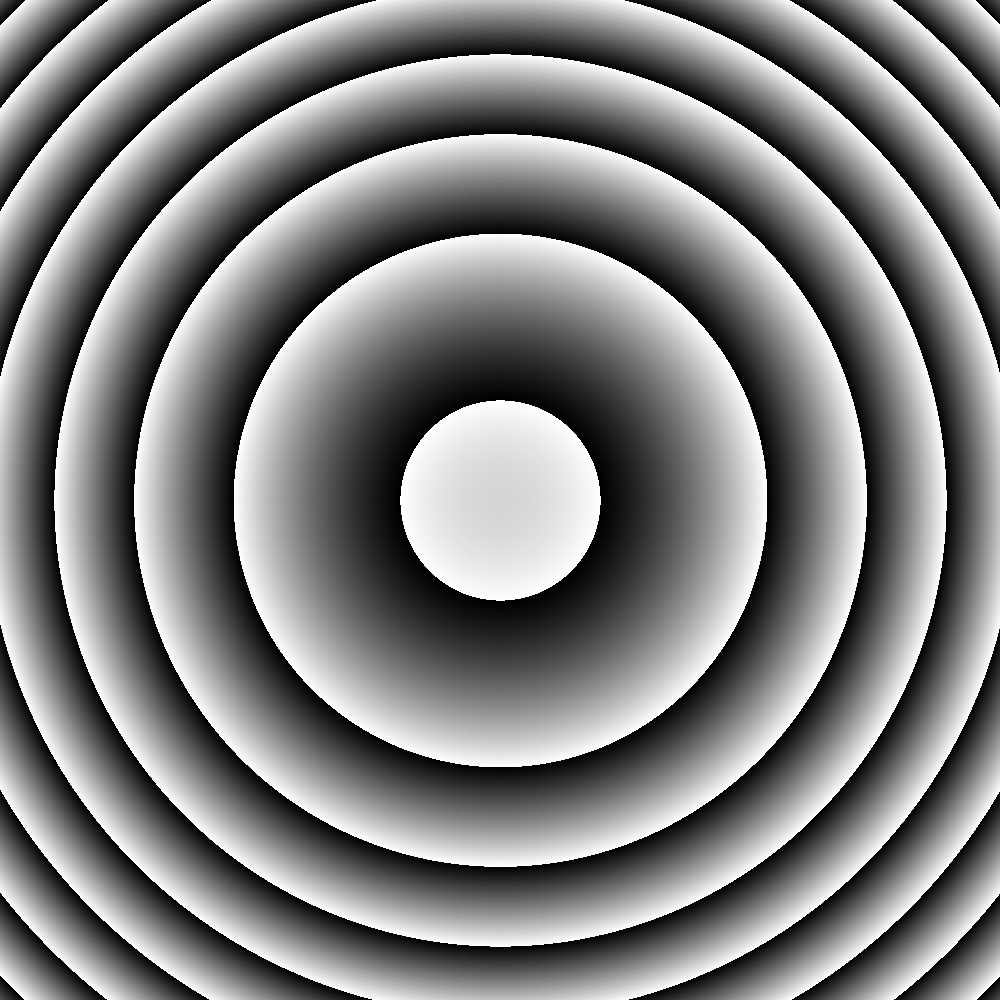

In [0]:
if __name__ == "__main__":
    main()